In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from keras.preprocessing.text import Tokenizer
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Lee un archivo CSV en un DataFrame
df = pd.read_csv('datos.csv')

# Muestra las primeras filas del DataFrame
df.head()

,Unnamed: 0,Nombres,Fecha,Comentario,Valoracion_Personas,Etiqueta
0,0,Samara Almanza,9 de julio de 2023,"La app está linda, pero muy simple, le falta v...",639 personas han valorado esta reseña como útil,negativo
1,1,WolfBanner,10 de julio de 2023,Puntos Negativos (a grandes rasgos): crashea a...,3022 personas han valorado esta reseña como útil,negativo
2,2,Isabella Leal la rosa,29 de julio de 2023,"Estaba leyendo muchas de las reseñas, muchas d...",2075 personas han valorado esta reseña como útil,neutral
3,3,Rainer Gomez,7 de julio de 2023,"Es una app bastante interesante, pero hasta el...",2000 personas han valorado esta reseña como útil,negativo
4,4,Javier Lerma,18 de julio de 2023,"La aplicación es demasiado simple, no es atrac...",1455 personas han valorado esta reseña como útil,negativo


In [ ]:
df.shape

(1480, 6)

In [ ]:
df=df.rename(columns={"Etiqueta":"Sentimiento"})

In [ ]:
df.index = range(1480)
df['Comentario'].apply(lambda x: len(x.split(' '))).sum()

47114

In [ ]:
# visualizing data

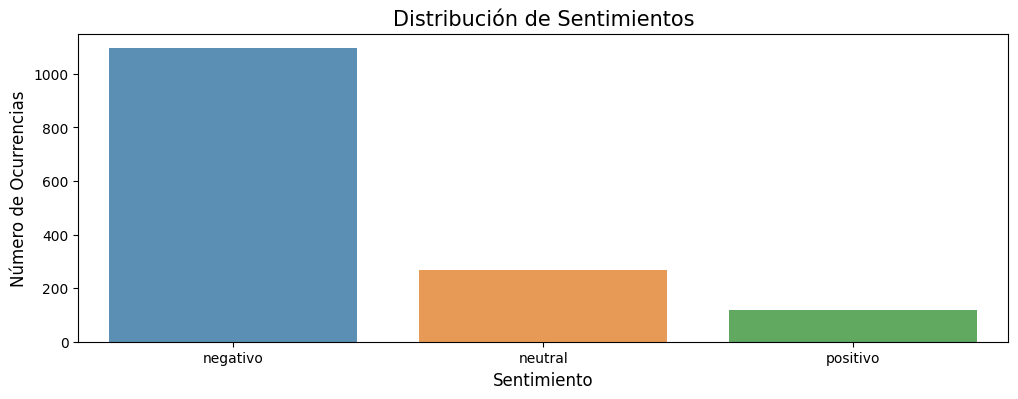

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtén el recuento de cada categoría de sentimiento

cnt_pro = df['Sentimiento'].value_counts()

# Crea el gráfico de barras
plt.figure(figsize=(12, 4))
sns.barplot(x=cnt_pro.index, y=cnt_pro.values, alpha=0.8)

# Configura etiquetas y título
plt.ylabel('Número de Ocurrencias', fontsize=12)
plt.xlabel('Sentimiento', fontsize=12)
plt.title('Distribución de Sentimientos', fontsize=15)

# Rotación de etiquetas en el eje x para mayor legibilidad
plt.xticks(rotation=0)  # Puedes ajustar el ángulo de rotación según tu preferencia

# Muestra el gráfico
plt.show()


In [ ]:
#Convert sting to numeric
sentiment  = {'positivo': 0,'neutral': 1,'negativo':2}

df.Sentimiento = [sentiment[item] for item in df.Sentimiento]
print(df)

      Unnamed: 0                Nombres                Fecha  \
0              0         Samara Almanza   9 de julio de 2023   
1              1             WolfBanner  10 de julio de 2023   
2              2  Isabella Leal la rosa  29 de julio de 2023   
3              3           Rainer Gomez   7 de julio de 2023   
4              4           Javier Lerma  18 de julio de 2023   
...          ...                    ...                  ...   
1475        1475     TvFoxPlay TvGratis  3 de agosto de 2023   
1476        1476            Camila Diaz   7 de julio de 2023   
1477        1477          lian martinez   7 de julio de 2023   
1478        1478          Armando Grado   6 de julio de 2023   
1479        1479        Matias Orbegozo   8 de julio de 2023   

                                             Comentario  \
0     La app está linda, pero muy simple, le falta v...   
1     Puntos Negativos (a grandes rasgos): crashea a...   
2     Estaba leyendo muchas de las reseñas, muchas d..

In [ ]:
def print_message(index):
    example = df[df.index == index][['Comentario', 'Sentimiento']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Message:', example[1])
print_message(12)

threads le podría faltar algunas cosas, Pero entre ellas, Una podría ser de una manera divertida, La fuente de color, Una fuente de colores ( letras) pues por la diversión pero personalmente si está bien la versión actual, Traducción, privacidad y algunas cosas como entretenimiento
Message: 2


In [ ]:
print_message(0)

La app está linda, pero muy simple, le falta varias cosas: Editar los hilos, guardar y ver los hilos a los que das me gusta, tener la opción de ver los temas en tendencia, descargar los vídeos e imágenes, guardar los hilos que te gusten, tener la opción de agregar gifs e imágenes que no necesariamente estén guardados en tu memoria, agregar música, tener la opción de que te salgan solo los hilos de gente que sigas. Por el momento la app está bien pero a veces tarda mucho en cargar.
Message: 2


In [ ]:
from bs4 import BeautifulSoup
def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text)
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    text = text.replace('x', '')
    return text
df['Comentario'] = df['Comentario'].apply(cleanText)

<ipython-input-11-c73b51812e08>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "lxml").text


In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df['Comentario'] = df['Comentario'].apply(cleanText)
train, test = train_test_split(df, test_size=0.000001 , random_state=42)
import nltk
from nltk.corpus import stopwords
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            #if len(word) < 0:
            if len(word) <= 0:
                continue
            tokens.append(word.lower())
    return tokens
train_tagged = train.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['Comentario']), tags=[r.Sentimiento]), axis=1)
test_tagged = test.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['Comentario']), tags=[r.Sentimiento]), axis=1)

# The maximum number of words to be used. (most frequent)
max_fatures = 500000

# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 50

#tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer = Tokenizer(num_words=max_fatures, split=' ', filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['Comentario'].values)
X = tokenizer.texts_to_sequences(df['Comentario'].values)
X = pad_sequences(X)
print('Found %s unique tokens.' % len(X))

<ipython-input-11-c73b51812e08>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "lxml").text


Found 1480 unique tokens.


In [ ]:
X

array([[   0,    0,    0, ...,   52,   10,  320],
       [   0,    0,    0, ..., 2125,  126,  512],
       [   0,    0,    0, ...,   12, 2130, 1473],
       ...,
       [   0,    0,    0, ...,  139,    3,  109],
       [   0,    0,    0, ...,   11,   87,  718],
       [   0,    0,    0, ...,   58,   61,  474]], dtype=int32)

In [ ]:
X = tokenizer.texts_to_sequences(df['Comentario'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (1480, 50)


In [ ]:
#train_tagged.values[2173]
train_tagged.values

array([TaggedDocument(words=['1', 'estrella', 'por', 'la', 'abusiva', 'cantidad', 'de', 'información', 'privada', 'que', 'solicita', 'al', 'usuario', 'como', 'lo', 'son', '``', 'salud', ',', 'información', 'financiera', ',', 'contactos', ',', 'historial', 'de', 'navegación', ',', 'uso', 'de', 'datos', 'móviles', ',', 'diagnóstico', ',', 'compras', ',', 'ubicación', ',', 'búsquedas', ',', 'identificadores', ',', 'información', 'sensible', ',', 'contenido', 'de', 'los', 'usuarios', 'que', 'sigues', 'y', 'otros', 'no', 'especificados', '.', "''", '-y', 'muy', 'mal', 'porque', 'si', 'decidimos', 'eliminar', 'nuestra', 'cuenta', '``', 'threads', "''", 'estaríamos', 'eliminando', 'nuestra', 'la', 'cuenta', 'principal', 'de', 'instagram', '.', '-contenido', 'repetitivo', '.'], tags=[2]),
       TaggedDocument(words=['se', 'cierra', 'la', 'aplicación', 'inesperadamente', 'cuando', 'estoy', 'escribiendo', ',', 'ya', 'la', 'desinstale', 'y', 'volví', 'a', 'instalar', 'y', 'es', 'lo', 'mismo', ',

In [ ]:
d2v_model = Doc2Vec(dm=1, dm_mean=1, vector_size=20, window=8, min_count=1, workers=1, alpha=0.065, min_alpha=0.065)
d2v_model.build_vocab([x for x in tqdm(train_tagged.values)])


100%|██████████| 1479/1479 [00:00<00:00, 1336934.40it/s]


In [ ]:
%%time
for epoch in range(30):
    d2v_model.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    d2v_model.alpha -= 0.002
    d2v_model.min_alpha = d2v_model.alpha

100%|██████████| 1479/1479 [00:00<00:00, 960126.24it/s]


CPU times: user 7.62 s, sys: 78.4 ms, total: 7.7 s
Wall time: 15.2 s


In [ ]:
print(d2v_model)

Doc2Vec<dm/m,d20,n5,w8,s0.001>


In [ ]:
len(d2v_model.dv.index_to_key)


3

In [ ]:
# Obtén la longitud del vocabulario a partir de index_to_key
vocab_length = len(d2v_model.dv.index_to_key)

# Crea la matriz de incrustación inicializada con ceros
embedding_matrix = np.zeros((vocab_length + 1, 20))  # Asume que el tamaño del vector es 20

# Rellena la matriz de incrustación con los vectores de palabras
for i, word in enumerate(d2v_model.dv.index_to_key):
    embedding_vector = d2v_model.dv.get_vector(word)
    if embedding_vector is not None:
        embedding_matrix[i + 1] = embedding_vector  # +1 para evitar el índice 0

# Ahora, embedding_matrix contiene los vectores de palabras en forma de matriz


In [ ]:
# Measuring distance between two vectors (related to cosine similarity)

In [ ]:
df.head()

,Unnamed: 0,Nombres,Fecha,Comentario,Valoracion_Personas,Sentimiento
0,0,Samara Almanza,9 de julio de 2023,"la app está linda, pero muy simple, le falta v...",639 personas han valorado esta reseña como útil,2
1,1,WolfBanner,10 de julio de 2023,puntos negativos (a grandes rasgos): crashea a...,3022 personas han valorado esta reseña como útil,2
2,2,Isabella Leal la rosa,29 de julio de 2023,"estaba leyendo muchas de las reseñas, muchas d...",2075 personas han valorado esta reseña como útil,1
3,3,Rainer Gomez,7 de julio de 2023,"es una app bastante interesante, pero hasta el...",2000 personas han valorado esta reseña como útil,2
4,4,Javier Lerma,18 de julio de 2023,"la aplicación es demasiado simple, no es atrac...",1455 personas han valorado esta reseña como útil,2


In [ ]:
# Contar cuántos ceros (0) tienes en la columna "Sentimiento"
cantidad_de_ceros = (df['Sentimiento'] == 0).sum()

# Imprimir la cantidad de ceros
print(f"Cantidad de ceros en la columna 'Sentimiento': {cantidad_de_ceros}")

Cantidad de ceros en la columna 'Sentimiento': 118


In [ ]:
# Contar cuántos unos (1) tienes en la columna "Sentimiento"
cantidad_de_ceros = (df['Sentimiento'] == 1).sum()

# Imprimir la cantidad de ceros
print(f"Cantidad de 1 en la columna 'Sentimiento': {cantidad_de_ceros}")

Cantidad de 1 en la columna 'Sentimiento': 267


In [ ]:
# Contar cuántos doses (2) tienes en la columna "Sentimiento"
cantidad_de_ceros = (df['Sentimiento'] == 2).sum()

# Imprimir la cantidad de ceros
print(f"Cantidad de 2 en la columna 'Sentimiento': {cantidad_de_ceros}")

Cantidad de 2 en la columna 'Sentimiento': 1095


In [ ]:
import pandas as pd
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Descargar la lista de stopwords en español si no la tienes
nltk.download('stopwords')
stopwords_spanish = set(stopwords.words('spanish'))


# Filtrar las filas donde "Sentimiento" es igual a 0
sentimiento_0 = df[df['Sentimiento'] == 0]

# Concatenar los comentarios en una sola cadena
comentarios = ' '.join(sentimiento_0['Comentario'])

# Tokenizar las palabras
palabras = comentarios.split()

# Filtrar las palabras eliminando las stopwords en español
palabras_filtradas = [palabra.lower() for palabra in palabras if palabra.lower() not in stopwords_spanish]

# Contar la frecuencia de cada palabra
frecuencia_palabras = Counter(palabras_filtradas)

# Obtener las 5 palabras más comunes
palabras_mas_comunes = frecuencia_palabras.most_common(5)

# Imprimir las 5 palabras más comunes y sus frecuencias
print("Las 5 palabras más comunes (sin stopwords en español) en comentarios con Sentimiento 0 son:")
for palabra, frecuencia in palabras_mas_comunes:
    print(f"'{palabra}': {frecuencia} ocurrencias")


Las 5 palabras más comunes (sin stopwords en español) en comentarios con Sentimiento 0 son:
'app': 36 ocurrencias
'buena': 33 ocurrencias
'aplicación': 23 ocurrencias
'twitter': 18 ocurrencias
'gusta': 16 ocurrencias


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
d2v_model.wv.most_similar(positive=['app'], topn=10)


[('aplicación', 0.8571616411209106),
 ('📱', 0.7912221550941467),
 ('comunidad', 0.7887798547744751),
 ('realizada', 0.7543168067932129),
 ('recordar', 0.7511799931526184),
 ('defectuosa', 0.7464021444320679),
 ('virus', 0.7368091344833374),
 ('desesperado', 0.7290073037147522),
 ('simplicidad', 0.7220069766044617),
 ('descargada', 0.7070203423500061)]

In [ ]:
d2v_model.wv.most_similar(positive=['buena'], topn=10)

[('fresca', 0.7448479533195496),
 ('estuviesen', 0.7419509887695312),
 ('querían', 0.7416414022445679),
 ('weba', 0.7406327128410339),
 ('twitterr', 0.7355034351348877),
 ('obligando', 0.6997349858283997),
 ('profundidad', 0.6940613985061646),
 ('restrictiva', 0.6912769079208374),
 ('trabando', 0.6912544965744019),
 ('iniciando', 0.6887046098709106)]

In [ ]:
d2v_model.wv.most_similar(positive=['aplicación'], topn=10)

[('app', 0.8571617007255554),
 ('defectuosa', 0.8418967723846436),
 ('ventanita', 0.7926285862922668),
 ('falla', 0.7732213139533997),
 ('desesperado', 0.7651621699333191),
 ('comunidad', 0.7273178100585938),
 ('aplicacion', 0.7140048146247864),
 ('sacaron', 0.7099772691726685),
 ('realizada', 0.7056635022163391),
 ('increíble', 0.6901670694351196)]

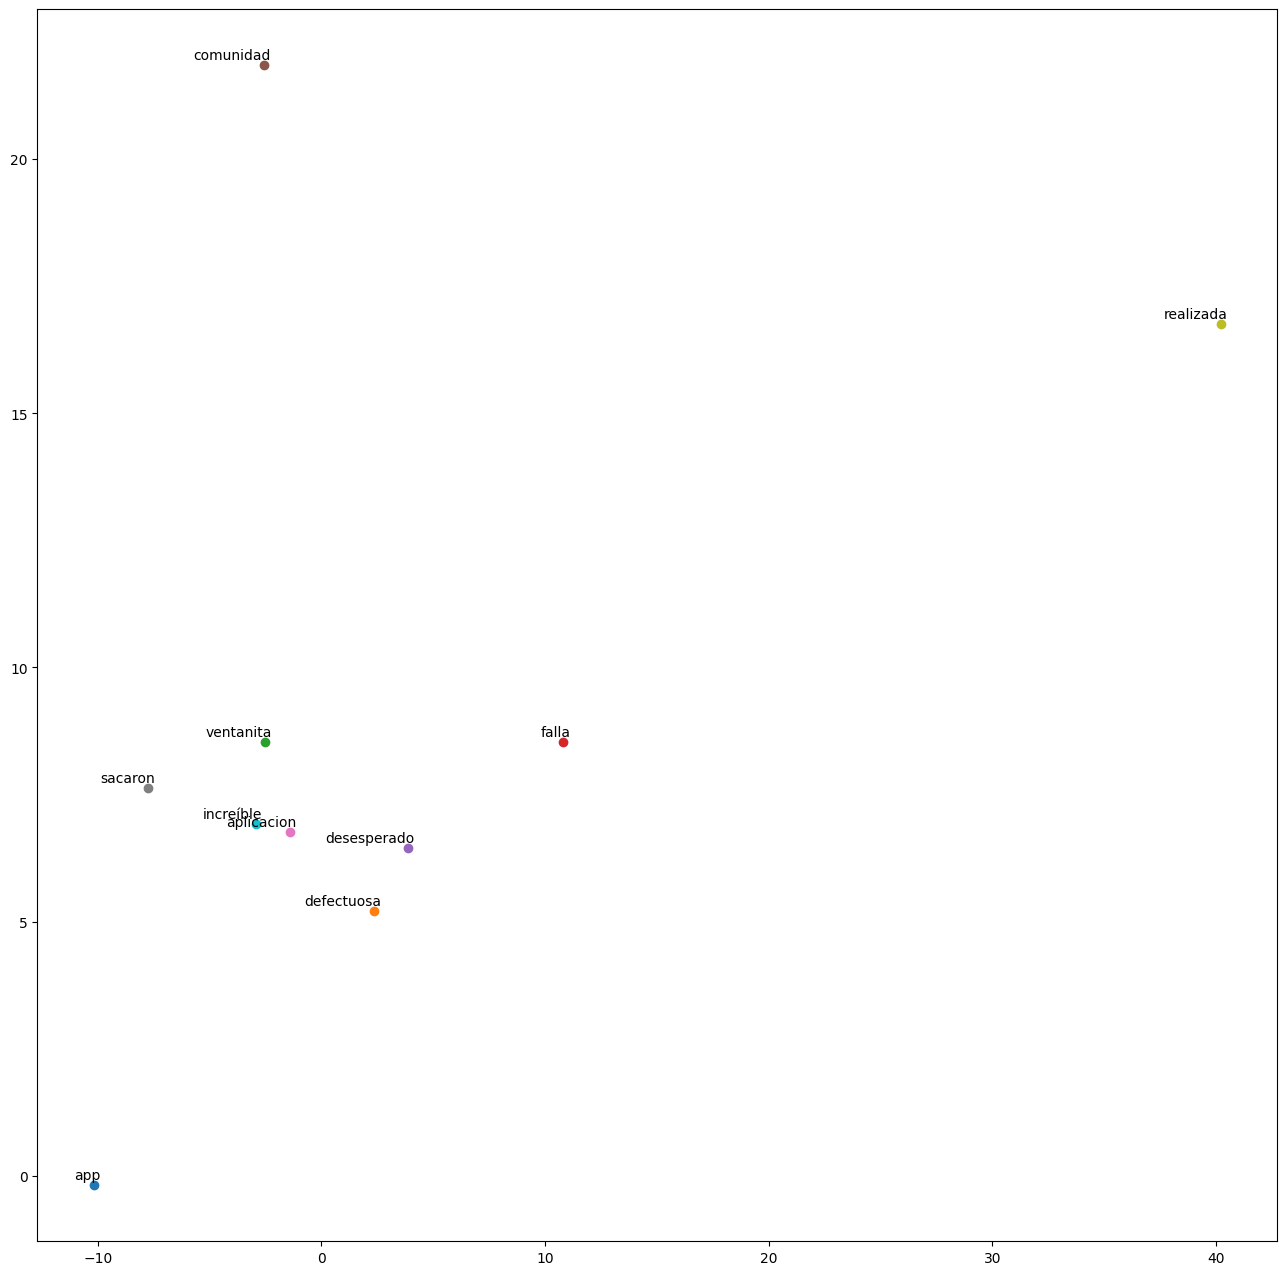

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

def tsne_plot(model, word):
    "Crea un modelo TSNE y lo grafica"
    labels = []
    tokens = []

    similar_words = model.wv.most_similar(positive=[word], topn=10)
    for similar_word, _ in similar_words:
        tokens.append(model.wv[similar_word])
        labels.append(similar_word)

    tokens = np.array(tokens)

    # Utiliza un valor de perplexity menor, por ejemplo, 5
    tsne_model = TSNE(perplexity=5, n_components=2, init='pca', n_iter=250, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i], y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

# Llama a la función tsne_plot con tu modelo Doc2Vec y la palabra de tu elección
tsne_plot(d2v_model, 'aplicación')




In [ ]:
# LSTM

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.utils import to_categorical

# Supongamos que tienes tus datos cargados en un DataFrame llamado 'df'
# Y has dividido tus datos en conjuntos de entrenamiento y prueba (X_train, X_test, Y_train, Y_test)

# Tokenizar el texto y convertirlo en secuencias numéricas
max_words = 10000  # Número máximo de palabras a considerar
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['Comentario'])
X = tokenizer.texts_to_sequences(df['Comentario'])

# Asegurarse de que todas las secuencias tengan la misma longitud
max_len = 100  # Longitud máxima de las secuencias
X = pad_sequences(X, maxlen=max_len)

# Convertir las etiquetas de clase en one-hot encoding
Y = to_categorical(df['Sentimiento'])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

# Crear el modelo de red neuronal LSTM
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(LSTM(128))
model.add(Dense(3, activation='softmax'))  # 3 clases de sentimiento: negativo, neutral y positivo

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
batch_size = 32
epochs = 50
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, verbose=2, validation_split=0.1)

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(f'Pérdida en el conjunto de prueba: {loss:.4f}')
print(f'Precisión en el conjunto de prueba: {accuracy*100:.2f}%')


Epoch 1/50
36/36 - 16s - loss: 0.7988 - accuracy: 0.7164 - val_loss: 0.6221 - val_accuracy: 0.7778 - 16s/epoch - 458ms/step
Epoch 2/50
36/36 - 10s - loss: 0.5874 - accuracy: 0.7562 - val_loss: 0.5650 - val_accuracy: 0.8016 - 10s/epoch - 275ms/step
Epoch 3/50
36/36 - 7s - loss: 0.3612 - accuracy: 0.8551 - val_loss: 0.7063 - val_accuracy: 0.7778 - 7s/epoch - 183ms/step
Epoch 4/50
36/36 - 10s - loss: 0.2255 - accuracy: 0.9152 - val_loss: 0.4914 - val_accuracy: 0.8016 - 10s/epoch - 272ms/step
Epoch 5/50
36/36 - 7s - loss: 0.1470 - accuracy: 0.9470 - val_loss: 0.5101 - val_accuracy: 0.8254 - 7s/epoch - 186ms/step
Epoch 6/50
36/36 - 10s - loss: 0.0915 - accuracy: 0.9770 - val_loss: 0.7897 - val_accuracy: 0.8016 - 10s/epoch - 279ms/step
Epoch 7/50
36/36 - 7s - loss: 0.0433 - accuracy: 0.9903 - val_loss: 0.7714 - val_accuracy: 0.7937 - 7s/epoch - 187ms/step
Epoch 8/50
36/36 - 10s - loss: 0.0250 - accuracy: 0.9947 - val_loss: 0.7080 - val_accuracy: 0.8016 - 10s/epoch - 275ms/step
Epoch 9/50
36/

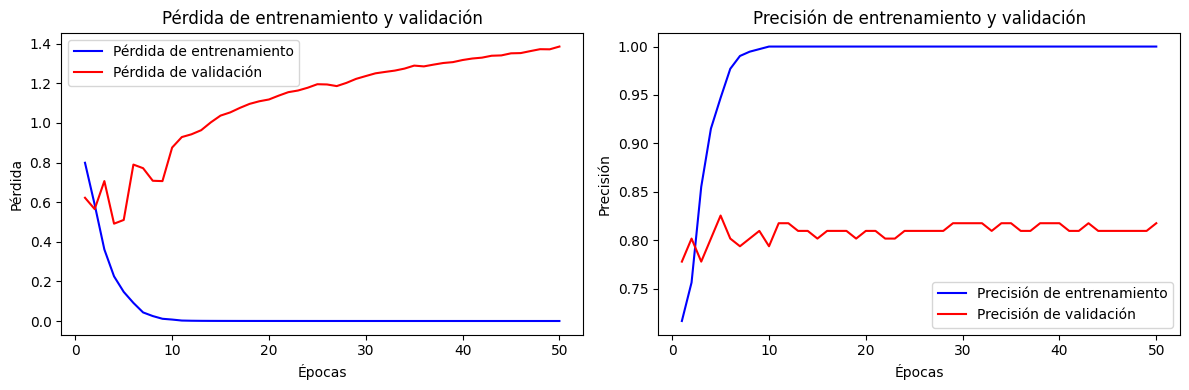

In [ ]:
# GRAFICOS

import matplotlib.pyplot as plt

# Historia del entrenamiento
training_loss = history.history['loss']
training_accuracy = history.history['accuracy']
validation_loss = history.history['val_loss']
validation_accuracy = history.history['val_accuracy']
epochs = range(1, len(training_loss) + 1)

# Gráfico de pérdida
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, training_loss, 'b', label='Pérdida de entrenamiento')
plt.plot(epochs, validation_loss, 'r', label='Pérdida de validación')
plt.title('Pérdida de entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Gráfico de precisión
plt.subplot(1, 2, 2)
plt.plot(epochs, training_accuracy, 'b', label='Precisión de entrenamiento')
plt.plot(epochs, validation_accuracy, 'r', label='Precisión de validación')
plt.title('Precisión de entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=0)
print(yhat_probs)

# Predict crisp classes for test set
yhat_classes = (yhat_probs > 0.5).astype(int)  # Convierte probabilidades en clases crujientes
print(yhat_classes)


[[8.38247331e-07 6.61368915e-07 9.99998391e-01]
 [2.69733710e-06 2.51902338e-06 9.99994695e-01]
 [7.88828572e-07 6.71985276e-07 9.99998510e-01]
 [2.42019439e-07 2.06538118e-07 9.99999464e-01]
 [6.27623422e-07 4.56932014e-07 9.99998868e-01]
 [1.03041195e-07 8.51669455e-08 9.99999702e-01]
 [2.46804859e-02 3.51280004e-01 6.24039471e-01]
 [2.00820750e-07 1.84254333e-07 9.99999583e-01]
 [9.24857341e-06 1.13407023e-05 9.99979317e-01]
 [1.29281875e-06 9.25327299e-07 9.99997675e-01]
 [7.87576118e-06 9.48216893e-06 9.99982536e-01]
 [1.35143719e-05 9.99962628e-01 2.38251705e-05]
 [1.94680229e-06 1.77334095e-06 9.99996245e-01]
 [3.77035263e-04 2.21860572e-03 9.97404337e-01]
 [5.86571275e-07 5.68790085e-07 9.99998748e-01]
 [2.46778512e-07 2.04853052e-07 9.99999464e-01]
 [1.62887693e-06 1.49349887e-06 9.99996841e-01]
 [9.60082907e-05 4.42043063e-04 9.99462008e-01]
 [4.56955459e-05 1.34214613e-04 9.99820232e-01]
 [9.21714957e-07 8.11225959e-07 9.99998152e-01]
 [8.81493324e-05 1.84680233e-04 9.997272

In [ ]:
import numpy as np
rounded_labels=np.argmax(Y_test, axis=1)
rounded_labels

array([2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 1, 1, 0, 2, 1, 2, 1, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 0, 2, 2,
       2, 2, 2, 2, 1, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1,
       2, 0, 1, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2,
       0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 0, 2,
       2, 2])

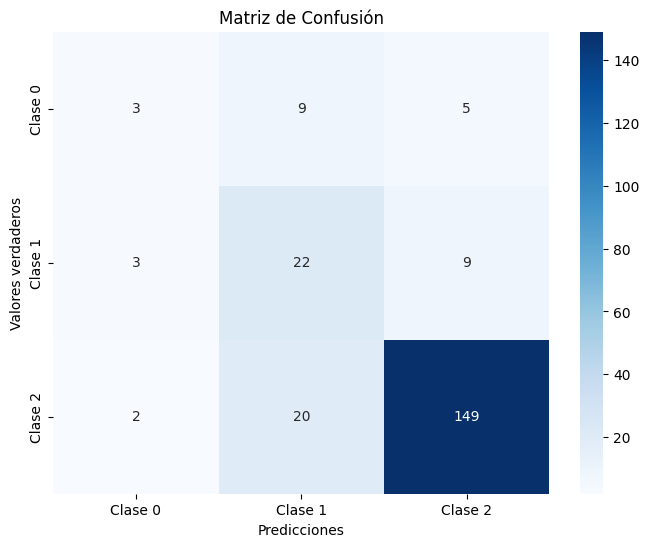

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de confusión
confusion_mtx = confusion_matrix(Y_test.argmax(axis=1), yhat_classes.argmax(axis=1))

# Crear un mapa de calor para visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Clase 0', 'Clase 1', 'Clase 2'],
            yticklabels=['Clase 0', 'Clase 1', 'Clase 2'])
plt.xlabel('Predicciones')
plt.ylabel('Valores verdaderos')
plt.title('Matriz de Confusión')
plt.show()


In [ ]:
model.save('Mymodel.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
message = ['La aplicación es de dificil uso y pero es amigable']
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['0','1','2']
print(pred, labels[np.argmax(pred)])

1/1 [==============================] - 0s 40ms/step
[[0.04939974 0.8042601  0.14634022]] 1


In [ ]:
message = ['La app es muy lenta y de facil acceso']
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['0','1','2']
print(pred, labels[np.argmax(pred)])

1/1 [==============================] - 0s 37ms/step
[[0.10059201 0.64769393 0.2517141 ]] 1
